# HarvestStat Data Profiling - Mozambique

In [1]:
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import geopandas as gpd
from tools import retreive_fdw_data, save_npz, PrintAdminUnits, PlotAdminShapes
from tools import FDW_PD_Sweeper, FDW_PD_AvalTable, FDW_PD_Compiling, FDW_PD_ValidateFnidName
from tools import FDW_PD_CreateAdminLink, FDW_PD_RatioAdminLink, FDW_PD_ConnectAdminLink
from tools import product_name_mapping, FDW_PD_CaliSeasonYear, FDW_PD_MergeCropProductionSystem
from tools_graphic import PlotBarProduction, PlotLinePAY
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

In [2]:
# Set loading parameters ------------------------ #
country_name = 'Mozambique'
country_iso2 = 'MZ'
use_api_data = False
requires_authentication = False
# ----------------------------------------------- #

# Load FEWS NET administrative boundaries ------- #
epsg = 'EPSG:32736' # Mozambique
fn_shapes = sorted(glob.glob(f"../data/shapefile/fewsnet/{country_iso2}_Admin?_????.shp"))
shape_all = []
for fn in fn_shapes:
    name = fn[-18:-4]
    exec('%s = gpd.read_file("%s").to_crs("%s")' % (name, fn, epsg))
    exec('%s["area"] = %s["geometry"].area/10**6' % (name, name))
    exec('shape_all.append(%s)' % (name))
shape_all = pd.concat(shape_all, axis=0).reset_index(drop=True)
# PrintAdminUnits(shape_all)
# ----------------------------------------------- #

# Load FDW data -------------------------------- #
df = retreive_fdw_data(country_name, country_iso2, use_api_data, requires_authentication)
# ----------------------------------------------- #

Data is loaded from the local file.
../data/crop_raw_data/adm_crop_data_raw_MZ.csv is loaded.


In [3]:
# Manual Pre-processing before Sweeping --------- #
# Default setting 
# a) None-type crop production system
df.loc[df['crop_production_system'].isna(), 'crop_production_system'] = 'none'
df.loc[df['crop_production_system'] == '', 'crop_production_system'] = 'none'
# b) None-type population group
df.loc[df['population_group'].isna(), 'population_group'] = 'none'
df.loc[df['population_group'] == '', 'population_group'] = 'none'
# Remove the 2005 Sweet Potatoes data (unreliable data, Donghoon)
rdx = df[(df['season_year']=='Main harvest 2005') & (df['product']=='Sweet Potatoes')]
df = df.drop(rdx.index)
# Change the season name
df['season_name'] = df['season_name'].replace({'Main harvest': 'Main'})
# ----------------------------------------------- #

# FDW Production Data Inspection ---------------- #
df, df_raw = FDW_PD_Sweeper(df)
table_dict = FDW_PD_AvalTable(df, shape_all)
# ----------------------------------------------- #

# FEWS NET Shapefile comparison ----------------- #
shape_used = pd.concat([MZ_Admin1_1990 ,MZ_Admin1_2013, MZ_Admin1_2016, MZ_Admin1_2021], axis=0)
PlotAdminShapes(shape_used, label=True)
# ----------------------------------------------- #

- Remove missing records ---------------------- #
Orignial data points: 24,172
Removed 12,428 "Missing Value" points
0/6,043 "Area Harvested" points are retained.
4,222/6,043 "Area Planted" points are retained.
4,368/6,043 "Quantity Produced" points are retained.
3,154/6,043 "Yield" points are retained.
Current data points: 11,744



- Minor changes are applied ------------------- #

- Basic information --------------------------- #
Data period: 1999 - 2022
57 grain types are found: Bambara groundnut, Banana (unspecified), Beans (Lima), Beans (Rosecoco), Beans (mixed), Beet, Cabbage (Unspecified), Capsicum frutescens,unspecified, Carrots, Cashew (unshelled), Cassava, Chili pepper (Unspecified), Cotton (Unspecified), Cowpea (unspecified), Cucumber, Eggplant, Garlic (fresh), Ginger, Green bean (fresh), Groundnuts (In Shell), Groundnuts (In Shell, Large), Groundnuts (In Shell, Small), Jute, Kale, Lettuce (Unspecified), Macadamia (unspecified), Maize Grain (White), Millet, Mung bean (unspecified), Okras (Fresh), Onions, Other root/tuber vegetable (unspecified), Paprika (unspecified), Pea (unspecified), Pepper (Piper spp.), Pigeon pea (Unspecified), Potato (Irish), Potato (unspecified), Rice (Paddy), Sesame Seed, Sisal, Sorghum, Soybean (unspecified), Spanish peanut (in shell), Squash (Pumpkin, Zucchini), Sugarcane (for

season_name                              Annual Cotton season   Main  \
                                                                       
Bambara groundnut                          0.0%          0.0%   0.1%   
Banana (unspecified)                       0.0%          0.0%   0.0%   
Beans (Lima)                               0.0%          0.0%   0.2%   
Beans (Rosecoco)                           0.0%          0.0%   0.2%   
Beans (mixed)                              0.0%          0.0%   1.0%   
Cashew (unshelled)                        10.4%          0.0%   0.0%   
Cassava                                   53.1%          0.0%   0.0%   
Chili pepper (Unspecified)                 0.0%          0.0%   0.0%   
Cotton (Unspecified)                       0.0%          0.5%   0.0%   
Cowpea (unspecified)                       0.0%          0.0%   0.7%   
Ginger                                     0.0%          0.0%   0.0%   
Green bean (fresh)                         0.0%          0.0%   

Main: 24 years (1999-2022) (missing: 0 years)
Annual: 24 years (1999-2022) (missing: 1 years)
Winter harvest: 1 years (2015-2015) (missing: 0 years)

- Number of "Quantity Produced" data points --- #
MZ1990A1: 1,988 data points are found.
MZ2013A1: 607 data points are found.
MZ2016A1: 1,084 data points are found.
MZ2016A2: 371 data points are found.
MZ2021A1: 318 data points are found.

- Districts with population group(s) ---------- #
0 districts includes 'population_group'.

Table of available data


----------------------------------------------- #
Crop type: Bambara groundnut
----------------------------------------------- #
season_name                Main                                                          
crop_production_system All (PS)                      Small_and_medium_scale              
fnid_short               1990A1 2013A1 2016A1 2021A1                 1990A1 2013A1 2016A1
year                                                                                     
2002                      11/11    NaN    NaN    NaN                    NaN    NaN    NaN
2003                      11/11    NaN    NaN    NaN                    NaN    NaN    NaN
2004                        NaN    NaN    NaN    NaN                    NaN    NaN    NaN
2005                      11/11    NaN    NaN    NaN                    NaN    NaN    NaN
2006                      11/11    NaN    NaN    NaN                    NaN    NaN    NaN
2007                      10/11    NaN    NaN    NaN         

season_name                Main                                                   
crop_production_system All (PS)               Small_and_medium_scale              
fnid_short               1990A1 2013A1 2016A1                 1990A1 2013A1 2016A1
year                                                                              
2010                      10/11    NaN    NaN                    NaN    NaN    NaN
2011                        NaN    NaN    NaN                    NaN    NaN    NaN
2012                       4/11    NaN    NaN                   4/11    NaN    NaN
2013                        NaN    NaN    NaN                    NaN    NaN    NaN
2014                        NaN   6/11    NaN                    NaN   6/11    NaN
2015                        NaN   7/11    NaN                    NaN   7/11    NaN
2016                        NaN    NaN    NaN                    NaN    NaN    NaN
2017                        NaN    NaN    NaN                    NaN    NaN    NaN
2018

../figures/MZ_admin_shapes.png is saved.



- Mozambique crop seasonal calendar

<img src="https://fews.net/sites/default/files/styles/large_width_880/public/2023-03/seasonal-calendar-mozambique.png?itok=hpXyM51B" width=900><br>

<img src="https://ipad.fas.usda.gov/countrysummary/images/MZ/cropcalendar/safrica_mz_calendar.png" width=900>

- comparison of boundaries

<img src="../figures/MZ_admin_shapes.png" width=900>

- In Mozambique, basd on the FEWS NET data, there were three changes in administrative units: 2013, 2016, and 2021
- While the admin unit 1 doesn't change between 1990 and 2013, we will still need to map between FNIDs

| year	 | Admin1   | # units   | Admin2   | # units   |
| :---: | :----:  | :----:   | :----:   | :---:  |
| 1990	 | MZ1990A1 | 11	| MZ1990A2	| 142	| 
| 2013	 | MZ2013A1 | 11	| MZ2013A2	| 154	| 
| 2016	 | MZ2016A1 | 11	| MZ2016A2	| 157	| 
| 2021	 | MZ2021A1 | 11	| MZ2021A2	| 158	|

- **`MZ2021A1`** is used to represent current admin-level 1 crop data.
- The data is all reported in a single `Main` season

In [4]:
# Define the latest shapefile ------------------- #
latest_level = 1
shape_latest = MZ_Admin1_2021.copy().to_crs('epsg:4326')
# ----------------------------------------------- #

# Validation of FNIDs and Names ----------------- #
df = FDW_PD_ValidateFnidName(df, shape_used, shape_latest)
# ----------------------------------------------- #

# FDW Production Data Compiling ----------------- #
area, prod = FDW_PD_Compiling(df, shape_used)
area_all, prod_all = area.copy(), prod.copy()
mdx_pss = area.columns.droplevel([0,1]).unique()
# ----------------------------------------------- #

In [5]:
# Link admin boundaries ------------------------- #
link_1990, over_1990 = FDW_PD_CreateAdminLink(MZ_Admin1_1990, MZ_Admin1_2021, 'ADMIN1', 'ADMIN1', prod, epsg)
link_1990['MZ1990A106'].update(method='PBR')
link_2013, over_2013 = FDW_PD_CreateAdminLink(MZ_Admin1_2013, MZ_Admin1_2021, 'ADMIN1', 'ADMIN1', prod, epsg)
link_2013['MZ2013A106'].update(method='PBR')
link_2016, over_2016 = FDW_PD_CreateAdminLink(MZ_Admin1_2016, MZ_Admin1_2021, 'ADMIN1', 'ADMIN1', prod, epsg)
link_2016['MZ2016A106'].update(method='PBR')
# Crop specific ratios
link_ratio_1990 = FDW_PD_RatioAdminLink(link_1990, prod, over_1990, mdx_pss)
link_ratio_2013 = FDW_PD_RatioAdminLink(link_2013, prod, over_2013, mdx_pss)
link_ratio_2016 = FDW_PD_RatioAdminLink(link_2016, prod, over_2016, mdx_pss)
link_merged = [link_ratio_1990, link_ratio_2013, link_ratio_2016]
fnids_new = list(link_merged[0].keys())
link_ratio = dict()
for fnid in fnids_new:
    container = []
    for link in link_merged:
        container.append(link[fnid])
    link_ratio[fnid] = pd.concat(container, axis=1)
# Add current unit to link_ratio
for fnid_new in link_ratio.keys():
    link_ratio[fnid_new][fnid_new] = 1.0
    link_ratio[fnid_new] = link_ratio[fnid_new].sort_index(axis=1, ascending=False)
# Connect data with AdminLink
area_new, prod_new = FDW_PD_ConnectAdminLink(link_ratio, area, prod, validation=False)
# ----------------------------------------------- #

CBR is considered for 'MZ1990A106' as no record found in: ['MZ2021A106']


CBR is considered for 'MZ2013A106' as no record found in: ['MZ2021A106']


CBR is considered for 'MZ2016A106' as no record found in: ['MZ2021A106']


In [6]:
# Manual correction ----------------------------- #
# Potential typo: 4.0 -> 40. Using an area of 4 results in sorghum yield >8 t/ha. Only change if it's not fixed in the underlying data
if (area_new.loc[2015,pd.IndexSlice['MZ2021A105',:,'Sorghum','Main','04-01','04-01','All (PS)']].values[0] == 4):
    area_new.loc[2015,pd.IndexSlice['MZ2021A105',:,'Sorghum','Main','04-01','04-01','All (PS)']] = 40
crop_new = prod_new/area_new
# ----------------------------------------------- #

# Complete long format DataFrame ---------------- #
df_area = area_new.T.stack().rename('value').reset_index()
df_area['indicator'] = 'area'
df_prod = prod_new.T.stack().rename('value').reset_index()
df_prod['indicator'] = 'production'
df_yield = crop_new.T.stack().rename('value').reset_index()
df_yield['indicator'] = 'yield'
stack = pd.concat([df_area, df_prod, df_yield], axis=0)
# Add "planting year"
cols = ['season_name','product','crop_production_system','planting_month','harvest_year','harvest_month','planting_year']
season_table = df[cols].drop_duplicates()
stack = stack.merge(season_table, on=cols[:-1])
# Add country and admin names
stack = stack.merge(df[['fnid','country','country_code','admin_1','admin_2']].drop_duplicates(), on='fnid', how='inner')
names = [
    'fnid','country','country_code','admin_1','admin_2','name',
    'product','season_name','planting_year','planting_month','harvest_year','harvest_month',
    'crop_production_system','indicator','value'
]
stack = stack[names]
# ----------------------------------------------- #

# Final Processing ------------------------------ #
# Product name mapping
stack = product_name_mapping(stack, list_except=None)
# Calibration of crop calendar using External Season Calendar (ESC)
esc = pd.read_csv('../data/crop_calendar/external_season_calendar.csv')
stack, link_ratio = FDW_PD_CaliSeasonYear(stack, esc, link_ratio=None)
# None admin names
stack.loc[stack['admin_1'].isna(), 'admin_1'] = 'none'
stack.loc[stack['admin_2'].isna(), 'admin_2'] = 'none'
# ----------------------------------------------- #

All [country, season_name] are in the external season calendar.


In [7]:
# Save data
fn_out = '../data/crop/adm_crop_production_MZ.csv'
stack.to_csv(fn_out); print(f'{fn_out} is saved.')

../data/crop/adm_crop_production_MZ.csv is saved.


# Visualization of production data

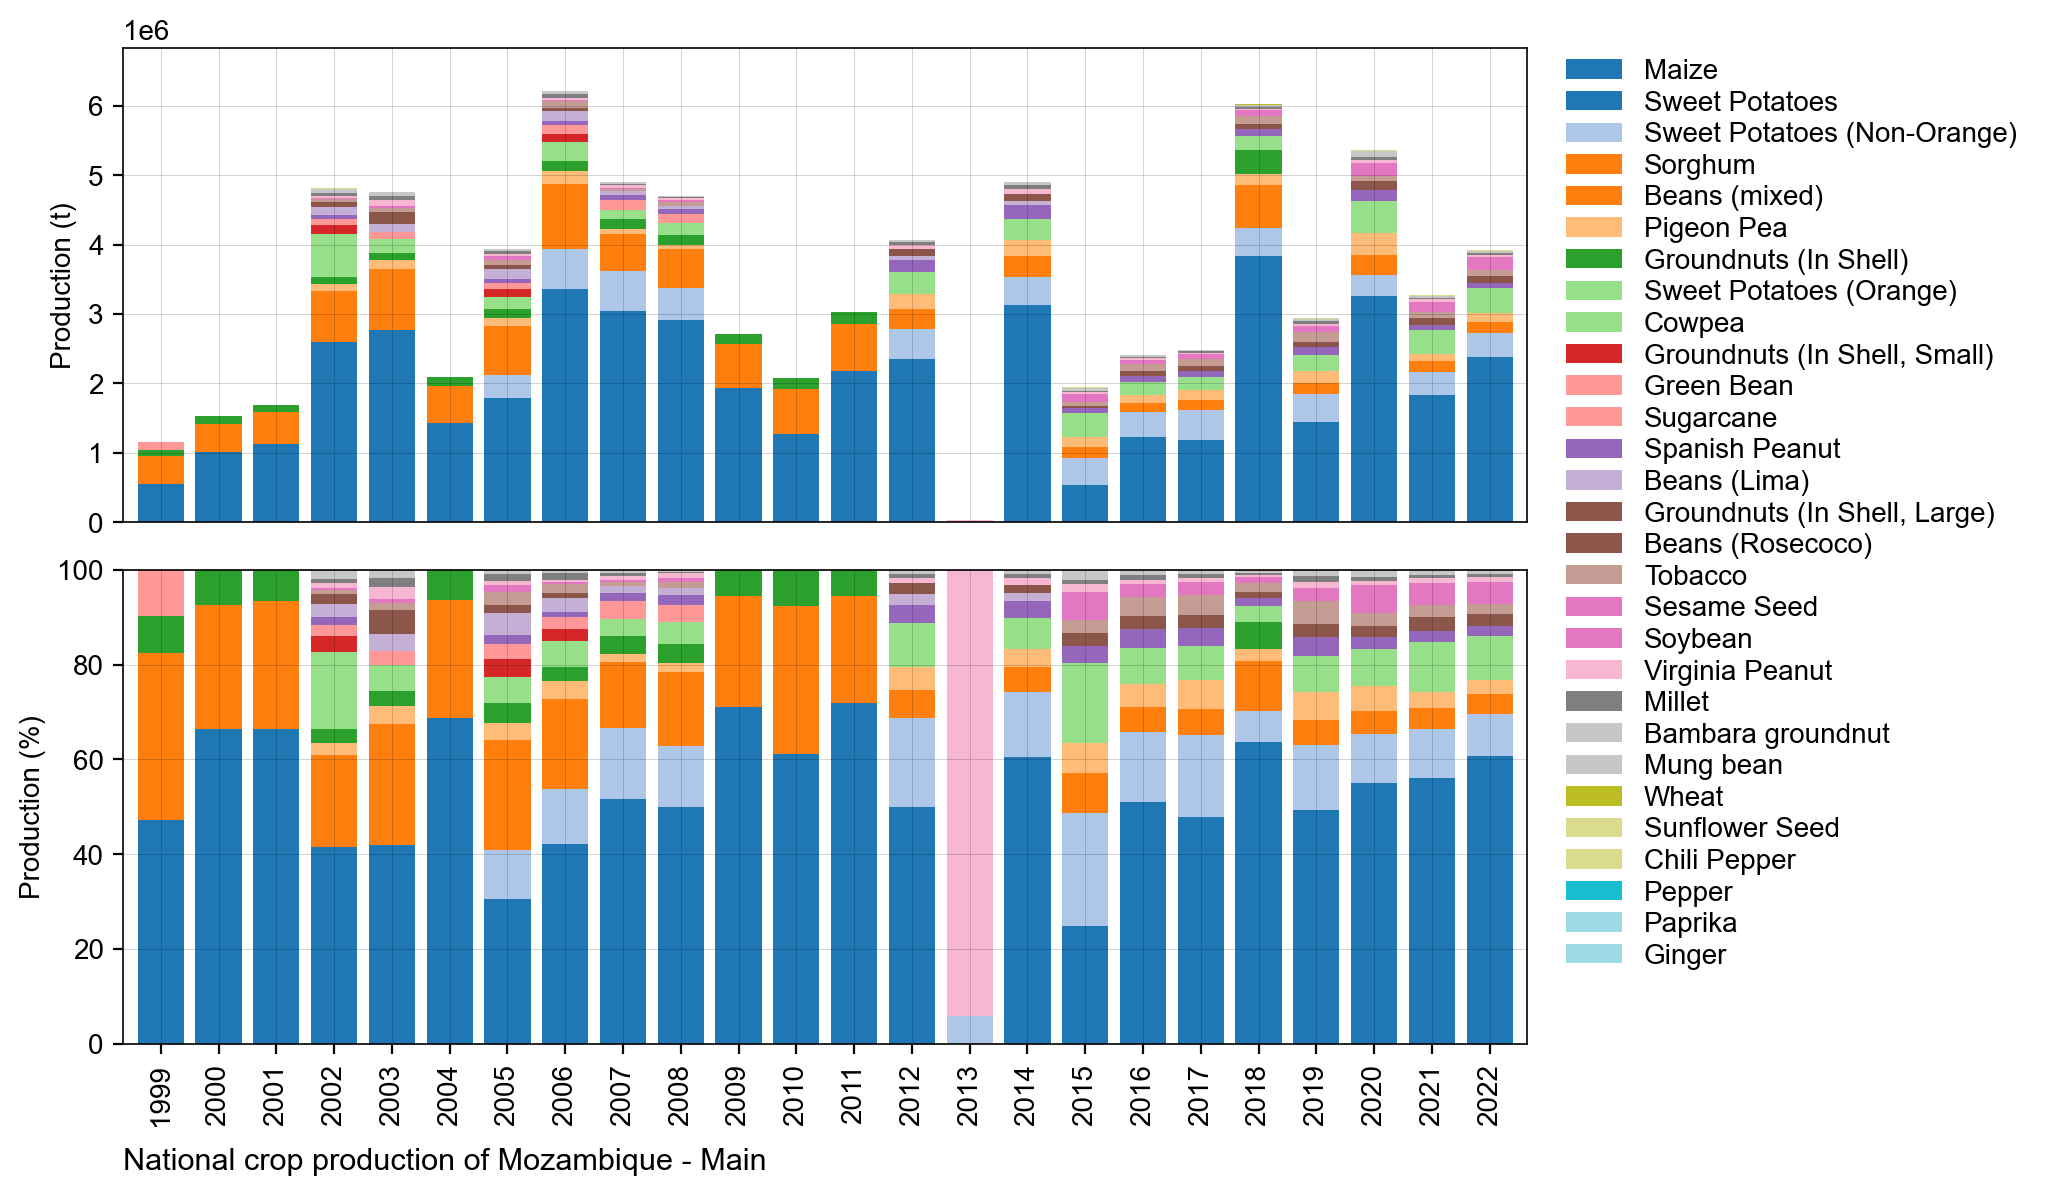

../figures/MZ_bar_natgrainprod_Main.png is saved.


In [8]:
# Bar chart of national crop production
country_iso, country_name = 'MZ', 'Mozambique'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
for season_name in ['Main']:
    footnote = 'National crop production of %s - %s' % (country_name, season_name)
    fn_save = '../figures/%s_bar_natgrainprod_%s.png' % (country_iso, season_name)
    sub = df[df['season_name'] == season_name]
    PlotBarProduction(sub, year, footnote, fn_save)

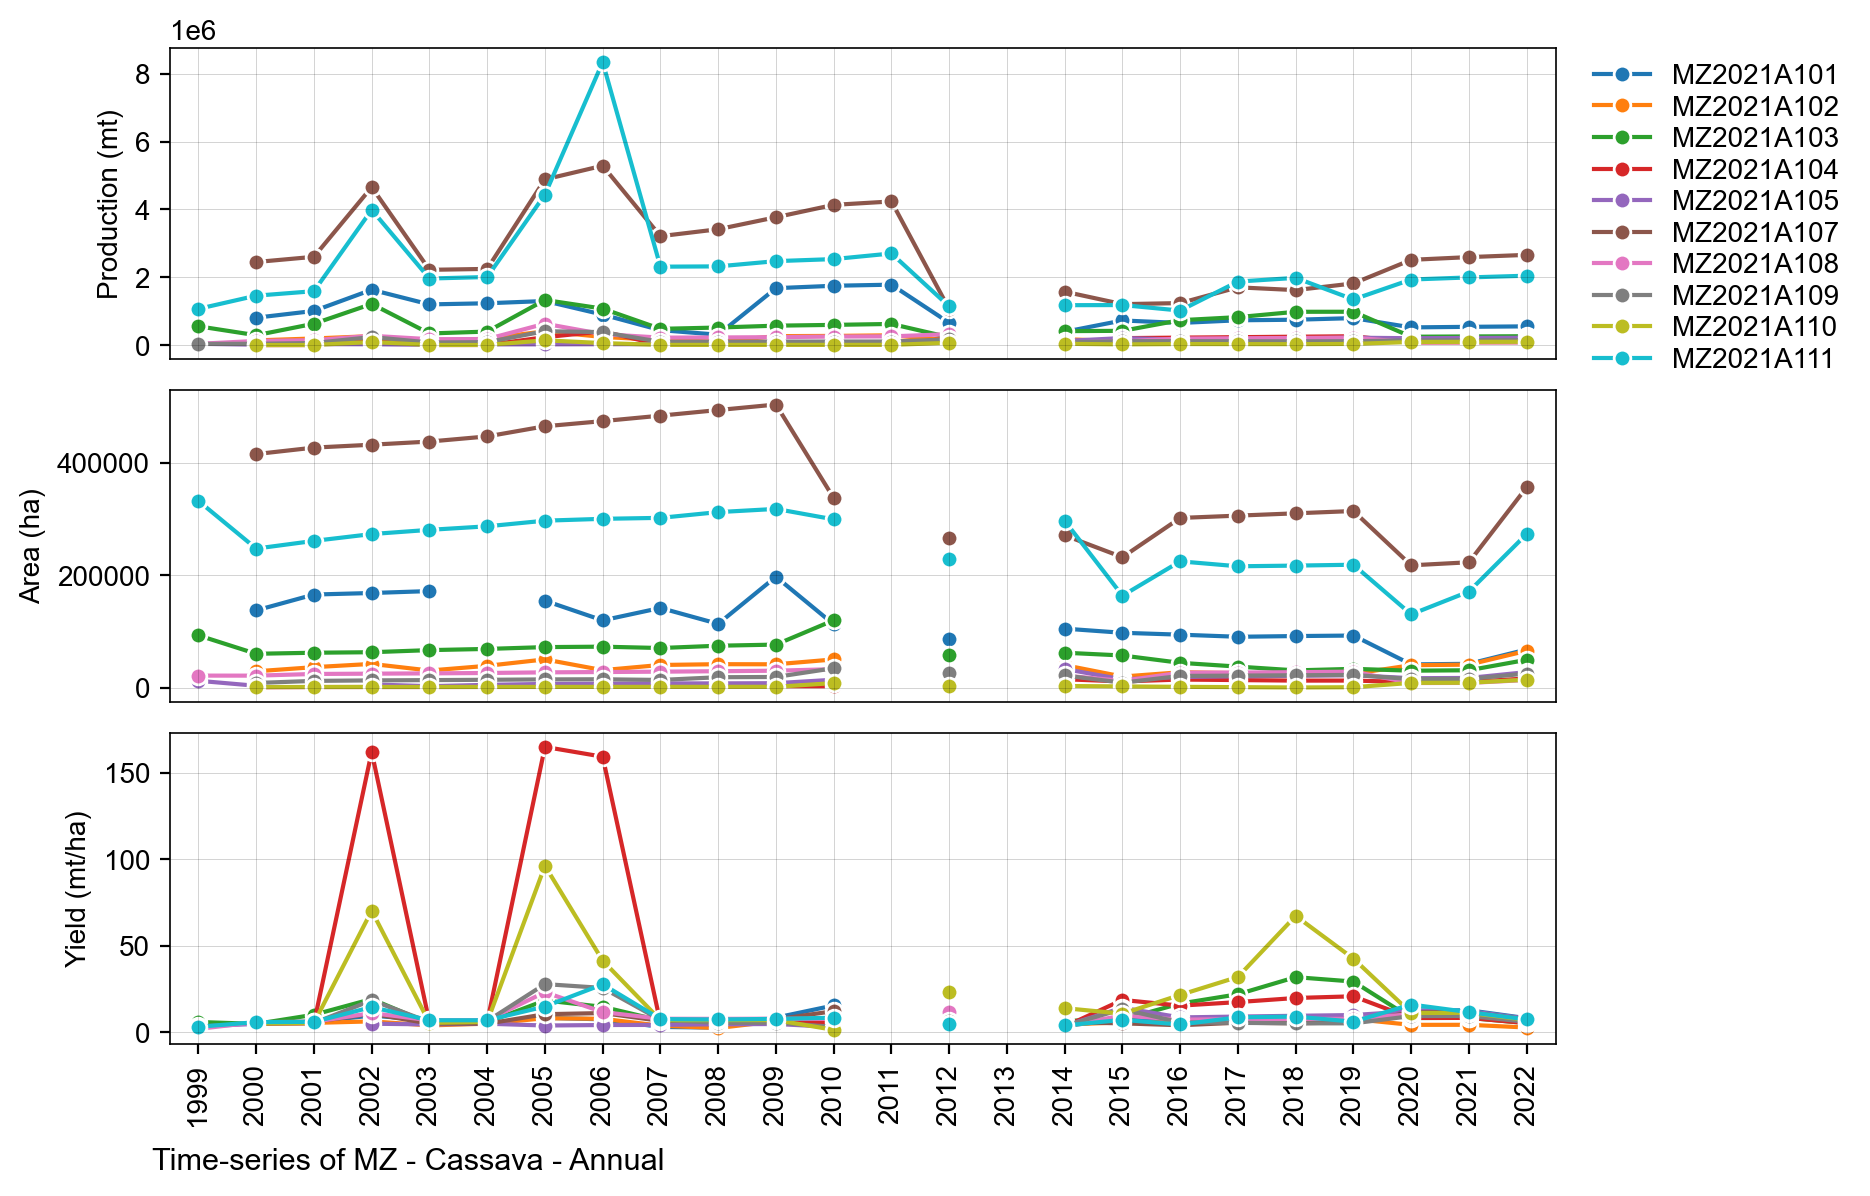

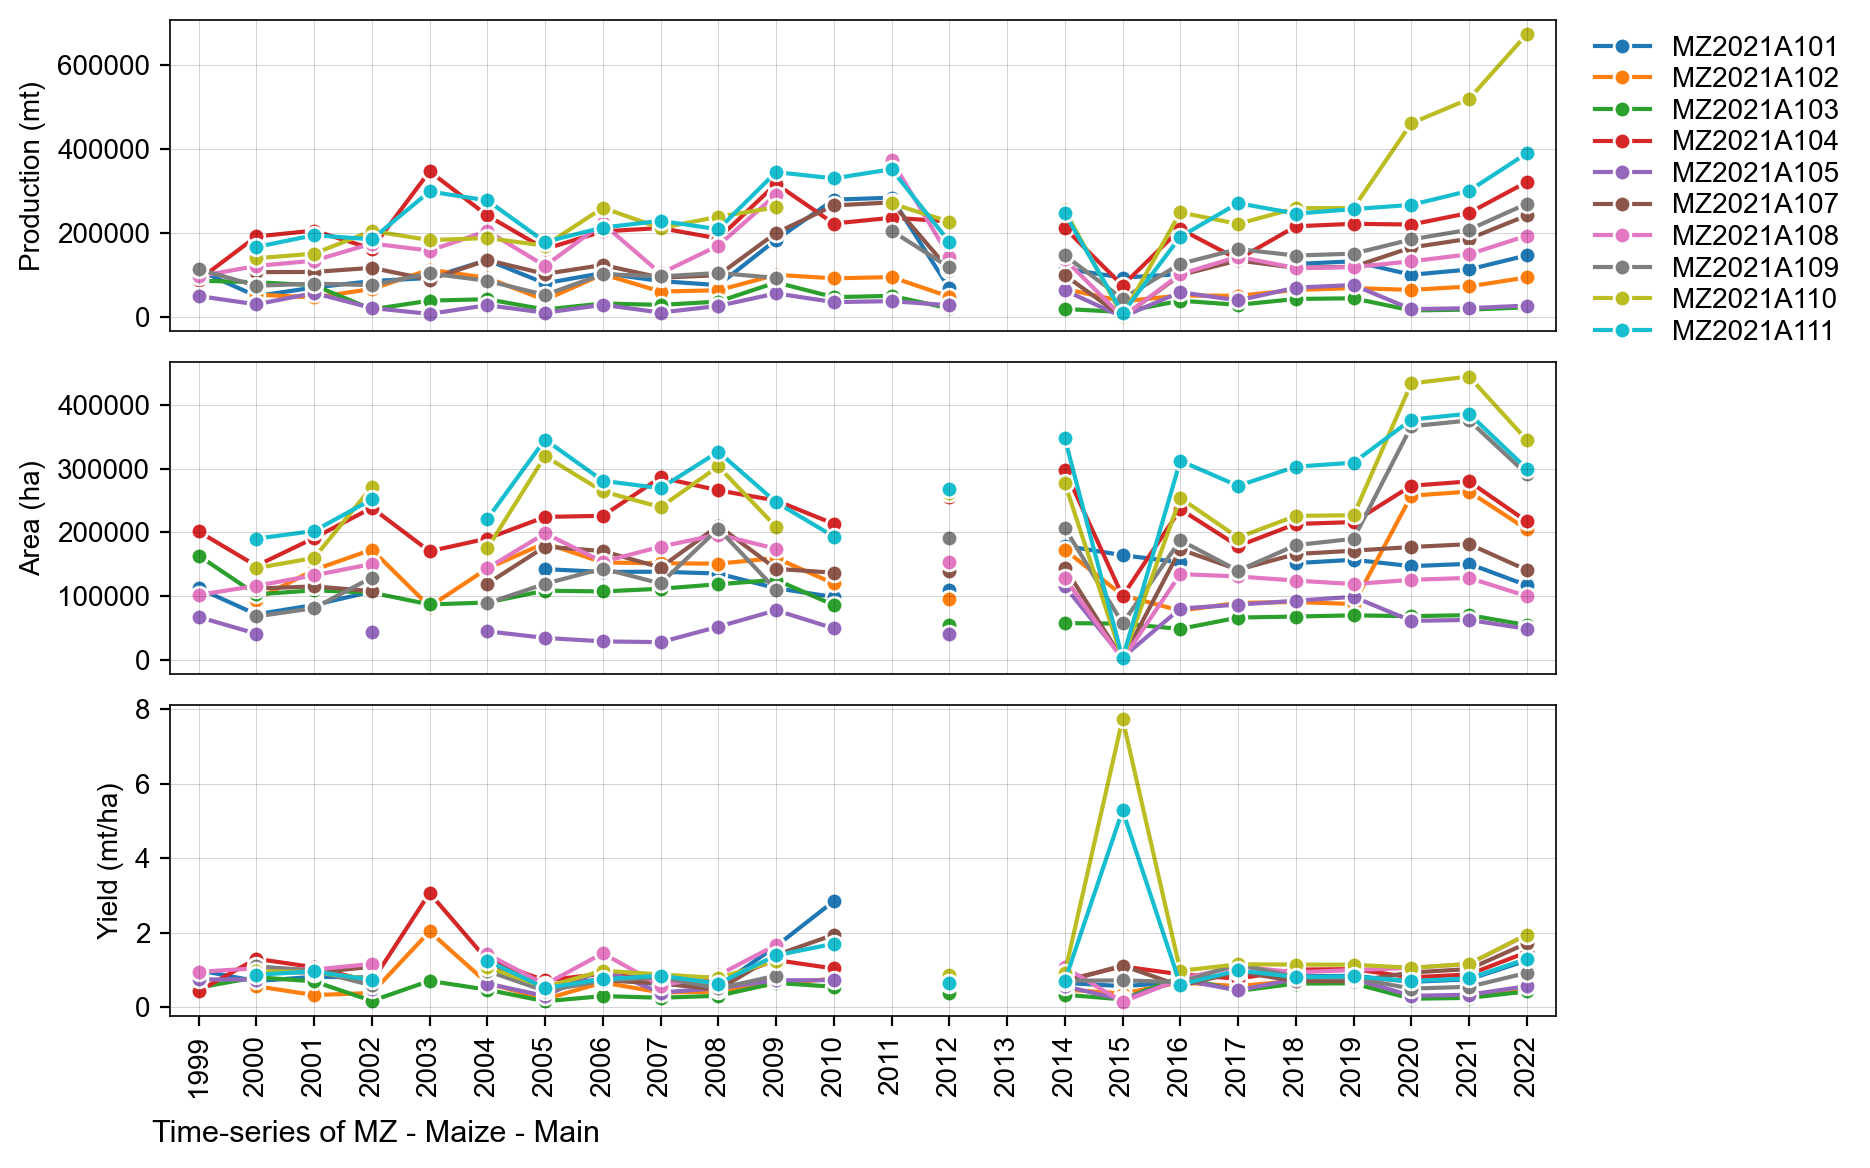

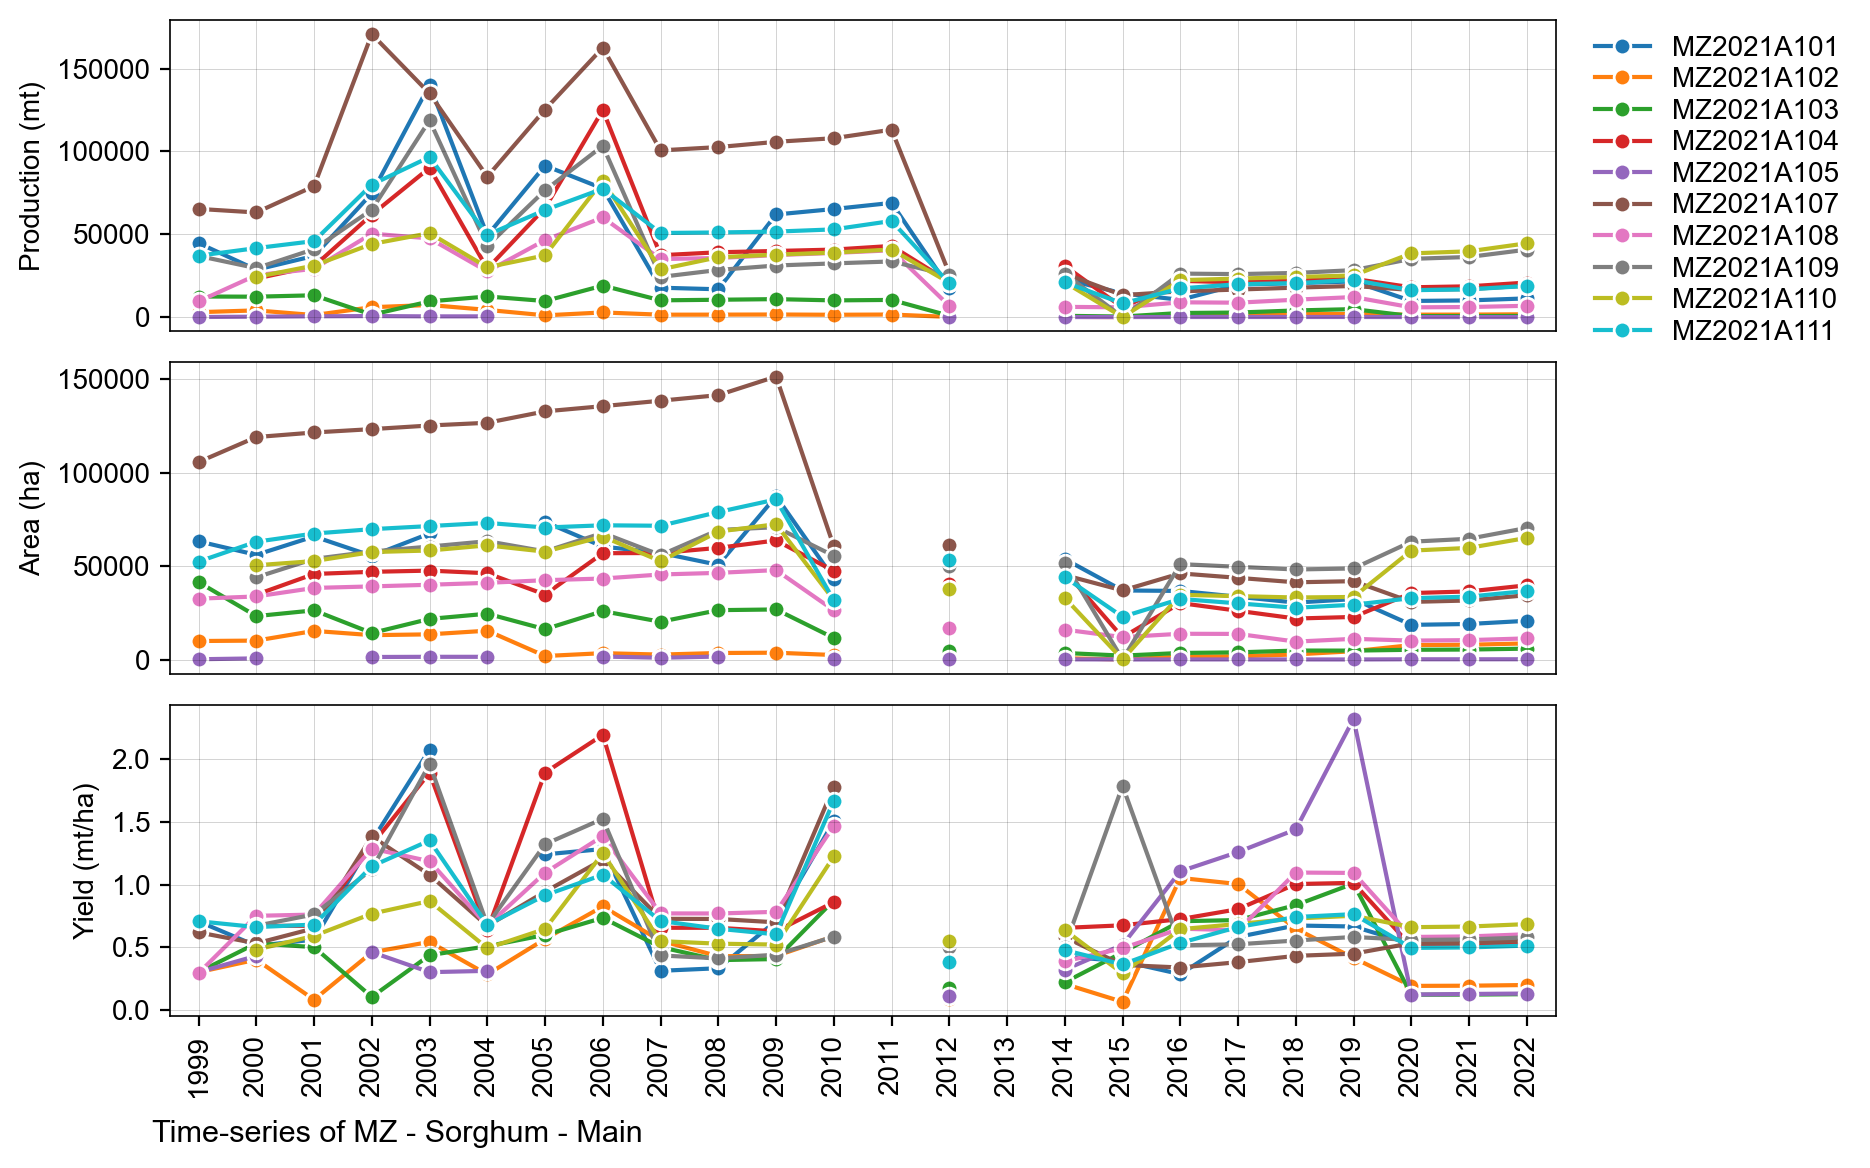

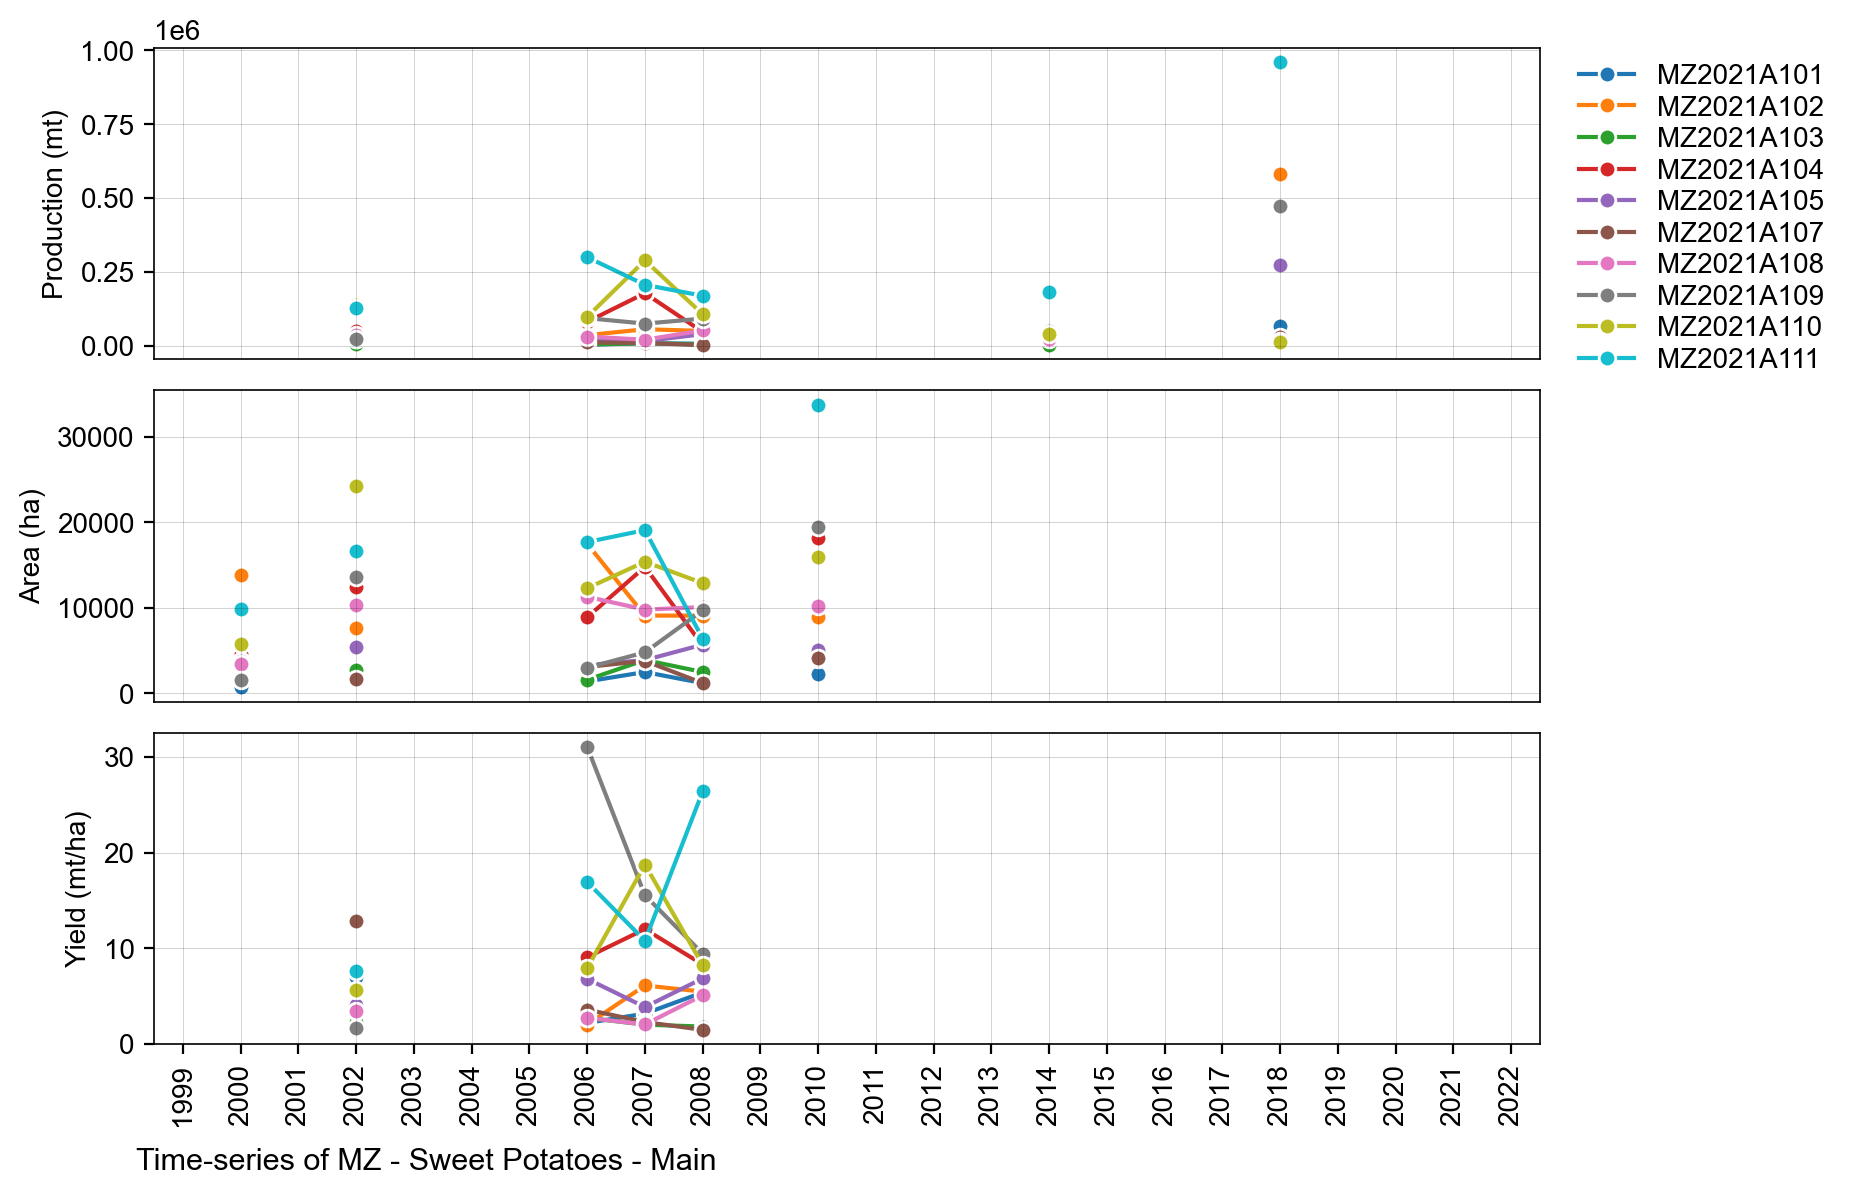

In [9]:
# Lineplot of Production-Area-Yield time-series
country_iso, country_name ='MZ', 'Mozambique'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
product_season = [
    ['Cassava','Annual'],
    ['Maize','Main'],
    ['Sorghum','Main'],
    ['Sweet Potatoes','Main'],
]
for product_name, season_name in product_season:
    footnote = 'Time-series of %s - %s - %s' % (country_iso, product_name, season_name)
    fn_save = '../figures/%s_line_pay_%s_%s.png' % (country_iso, product_name, season_name)
    sub = df[(df['product'] == product_name) & (df['season_name'] == season_name)]
    PlotLinePAY(sub, year, footnote)